In [67]:
print("EDA completed successfully")

EDA completed successfully


In [68]:
#check how many false and true are there,if equal then mix them according to some rule and split them 
#check the distribution of the data,if it is skewed then use some techniques to make it normal
#check the correlation between the features and the target variable,if there is a high correlation thenuse that feature for modeling
#check for outliers and handle them if necessary    


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('/Users/geetheswarreddy/Desktop/risk_1/data/raw_data/raw.csv')
df.drop(columns=["Student_ID"], inplace=True)
df.rename(columns={"Depression": "risk_flag"}, inplace=True)
print(df.head())

   Age  Gender   Department  CGPA  Sleep_Duration  Study_Hours  \
0   22  Female      Science  3.50             7.3          3.3   
1   20    Male  Engineering  2.72             5.5          7.2   
2   20    Male      Medical  3.01             5.4          2.3   
3   21    Male  Engineering  3.63             8.1          2.0   
4   19    Male         Arts  3.14             6.8          2.6   

   Social_Media_Hours  Physical_Activity  Stress_Level  risk_flag  
0                 3.4                114             5      False  
1                 6.0                142             2      False  
2                 1.8                137             3      False  
3                 4.6                130             3      False  
4                 4.3                  4             6      False  


In [71]:
df["risk_flag"]=  df["risk_flag"].astype(int)
print(df["risk_flag"].value_counts())

risk_flag
0    89938
1    10062
Name: count, dtype: int64


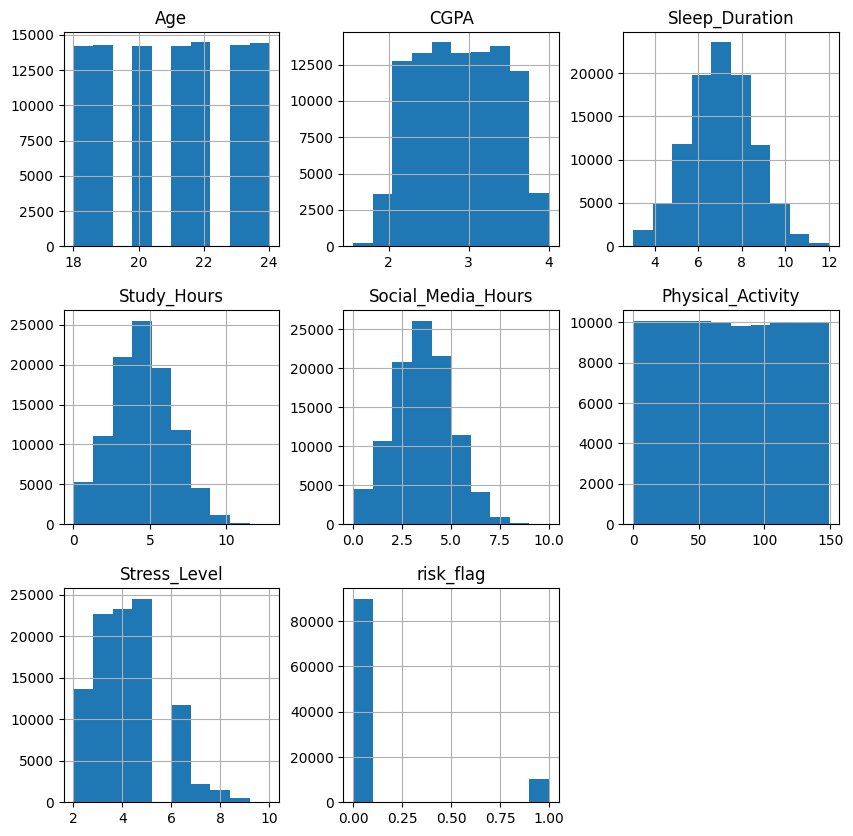

In [72]:
histogram = df.hist(figsize=(10, 10))

In [73]:
#one-hot encode the categorical variables,if any
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, dtype=float)
print(df.columns.tolist())
print(df.head())

['Age', 'CGPA', 'Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Stress_Level', 'risk_flag', 'Gender_Female', 'Gender_Male', 'Department_Arts', 'Department_Business', 'Department_Engineering', 'Department_Medical', 'Department_Science']
   Age  CGPA  Sleep_Duration  Study_Hours  Social_Media_Hours  \
0   22  3.50             7.3          3.3                 3.4   
1   20  2.72             5.5          7.2                 6.0   
2   20  3.01             5.4          2.3                 1.8   
3   21  3.63             8.1          2.0                 4.6   
4   19  3.14             6.8          2.6                 4.3   

   Physical_Activity  Stress_Level  risk_flag  Gender_Female  Gender_Male  \
0                114             5          0            1.0          0.0   
1                142             2          0            0.0          1.0   
2                137             3          0            0.0          1.0   
3                130             3  

/var/folders/8s/lvfdg1350zq74zk_s2hs9c4w0000gn/T/ipykernel_3403/3238491490.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["risk_flag"])
y = df["risk_flag"]


print(X.shape, y.shape)

(100000, 14) (100000,)


In [75]:
#split the data into training and testing sets, with 70% for training and 30% for testing, and stratify the split based on the target variable to maintain the same distribution in both sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#split the remaining 30% of the data into validation and testing sets, with 50% for validation and 50% for testing, and stratify the split based on the target variable to maintain the same distribution in both sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(70000, 14) (70000,)
(15000, 14) (15000,)
(15000, 14) (15000,)


In [76]:
print(df.isna().sum())

Age                       0
CGPA                      0
Sleep_Duration            0
Study_Hours               0
Social_Media_Hours        0
Physical_Activity         0
Stress_Level              0
risk_flag                 0
Gender_Female             0
Gender_Male               0
Department_Arts           0
Department_Business       0
Department_Engineering    0
Department_Medical        0
Department_Science        0
dtype: int64


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline=ImbPipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42))
])
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

print(X_train_resampled.shape)
print(y_train_resampled.value_counts())



(125914, 14)
risk_flag
0    62957
1    62957
Name: count, dtype: int64


In [78]:
#WRONG 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(class_weight='balanced',random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     13490
           1       0.24      0.00      0.01      1510

    accuracy                           0.90     15000
   macro avg       0.57      0.50      0.48     15000
weighted avg       0.83      0.90      0.85     15000

[[13477    13]
 [ 1506     4]]


/Users/geetheswarreddy/Desktop/risk_1/.renv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


***THE INPUT IS SCALED BEFORE BEING GIVEN TO COMPARE***

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_val_scaled)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     13490
           1       0.16      0.67      0.26      1510

    accuracy                           0.62     15000
   macro avg       0.55      0.64      0.51     15000
weighted avg       0.87      0.62      0.70     15000

[[8331 5159]
 [ 497 1013]]


In [80]:
for i in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    y_pred_threshold = (y_pred_proba >= i).astype(int)
    print(f"Threshold: {i}")
    print(classification_report(y_val, y_pred_threshold))
    print(confusion_matrix(y_val, y_pred_threshold))

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.96      0.22      0.36     13490
           1       0.12      0.91      0.20      1510

    accuracy                           0.29     15000
   macro avg       0.54      0.56      0.28     15000
weighted avg       0.87      0.29      0.34     15000

[[ 2977 10513]
 [  140  1370]]
Threshold: 0.4
              precision    recall  f1-score   support

           0       0.95      0.43      0.59     13490
           1       0.13      0.79      0.23      1510

    accuracy                           0.46     15000
   macro avg       0.54      0.61      0.41     15000
weighted avg       0.87      0.46      0.55     15000

[[5766 7724]
 [ 311 1199]]
Threshold: 0.5
              precision    recall  f1-score   support

           0       0.94      0.62      0.75     13490
           1       0.16      0.67      0.26      1510

    accuracy                           0.62     15000
   macro avg       0.55  

In [81]:
# Best results at threshold 0.4:
# precision=0.13, recall=0.79 for risk_flag=1
# This is the baseline logistic regression model

THRESHOLD = 0.4

y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
y_pred_final = (y_pred_proba >= THRESHOLD).astype(int)
print(f"Final model performance with threshold={THRESHOLD}:")
print(classification_report(y_val, y_pred_final))
print(confusion_matrix(y_val, y_pred_final))

Final model performance with threshold=0.4:
              precision    recall  f1-score   support

           0       0.95      0.43      0.59     13490
           1       0.13      0.79      0.23      1510

    accuracy                           0.46     15000
   macro avg       0.54      0.61      0.41     15000
weighted avg       0.87      0.46      0.55     15000

[[5766 7724]
 [ 311 1199]]


In [82]:
import joblib

artifact = {
    "model": model,
    "scaler": scaler,
    "threshold": THRESHOLD,
}
joblib.dump(artifact, 'logistic_regression_model.pkl')
print(f"Saved model, scaler, and threshold={THRESHOLD} to logistic_regression_model.pkl")

Saved model, scaler, and threshold=0.4 to logistic_regression_model.pkl
